In [414]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [415]:
pd.set_option('display.max_rows', 5)

In [416]:
df = pd.read_csv(r"C:\Users\henry\OneDrive - Louisiana State University\Dota2Predictor\dota.csv")

In [417]:
df.dropna(inplace=True)

# Use Binary Logistic Regression to predict Win Probability

## Win Probability vs. Number of Kills

#### Set x - Kills, y - Win Probability

In [418]:
X = df['Kills']

In [419]:
y - df['Result'].replace({"Won" : 1, "Lost" : 0}).to_frame()

,Result
0,0
1,0
...,...
287,0
288,0


#### Plot Result vs. Kills

Text(0, 0.5, 'Result')

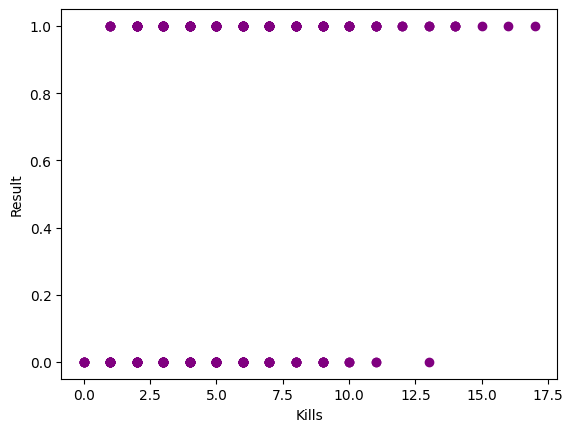

In [420]:
plt.scatter(X, y, color = 'purple', marker = "o")

plt.xlabel('Kills')
plt.ylabel('Result')

In [421]:
y.shape

(289, 1)

In [422]:
X_train.shape

(260, 1)

#### Divide the data set

In [423]:
X_train, X_test, y_train, y_test = train_test_split(df[['Kills']], y, train_size = 0.9)

In [424]:
model = LogisticRegression()

#### Train the model

In [425]:
model.fit(X_train,y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [426]:
ypred = model.predict(X_test)

#### Check Accuracy of model

In [427]:
model.score(X_test,y_test)

0.5172413793103449

#### Predict Win Probability vs. Kills

In [428]:
X_predict = np.arange(1,25)

In [429]:
probabilities = model.predict_proba(X_predict.reshape(-1,1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Win Probability vs. Predicted Number of Kills

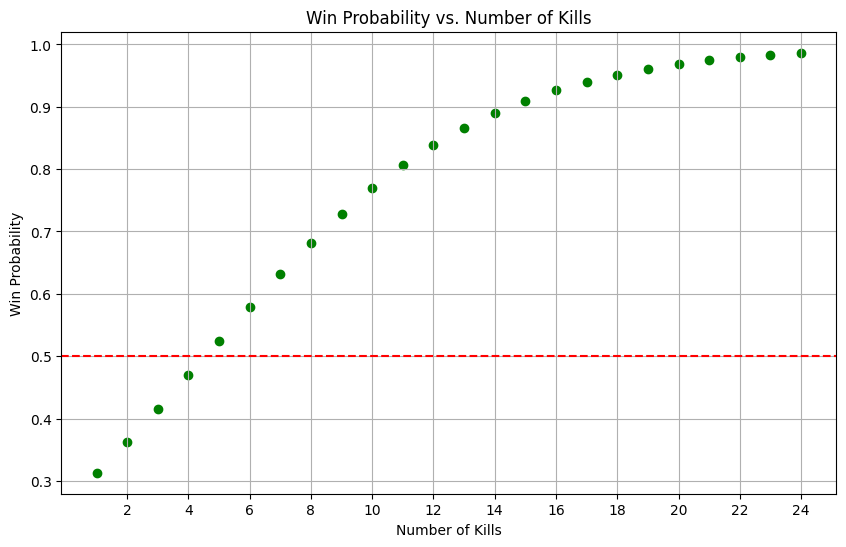

In [430]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')


x_ticks = list(range(2,26,2))

plt.xticks(x_ticks)
plt.xlabel('Number of Kills')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Number of Kills")

plt.axhline(y=0.5, color='red', linestyle = '--')

plt.grid(True)
plt.show()

## Win Probability vs. Number of Deaths

#### Set x - Deaths, y - Win Probability

In [431]:
X = df['Deaths']

In [432]:
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

#### Plot Result vs. Deaths

Text(0, 0.5, 'Result')

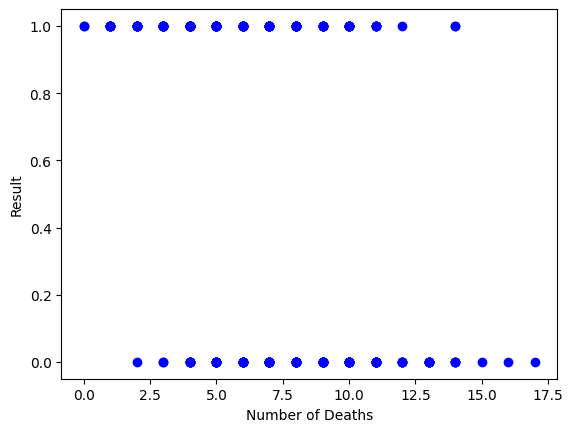

In [433]:
plt.scatter(df.Deaths, y.Result, marker = 'o', color = 'b')

plt.xlabel('Number of Deaths')
plt.ylabel('Result')

#### Divide Data Set

In [434]:
X_train, X_test, y_train, y_test = train_test_split(df[['Deaths']], y, train_size=0.9)

#### Train the model

In [435]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [436]:
ypred = model.predict(X_test)

### Check Accuracy

In [437]:
model.score(X_test,y_test)

0.7586206896551724

#### Predict Input of 1-18 Deaths

In [438]:
X_predict = np.arange(1,18)

In [439]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1)) # X_predict.reshape(-1, 1) convert 1D to 2D array

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Predicted Deaths vs. Win Probability

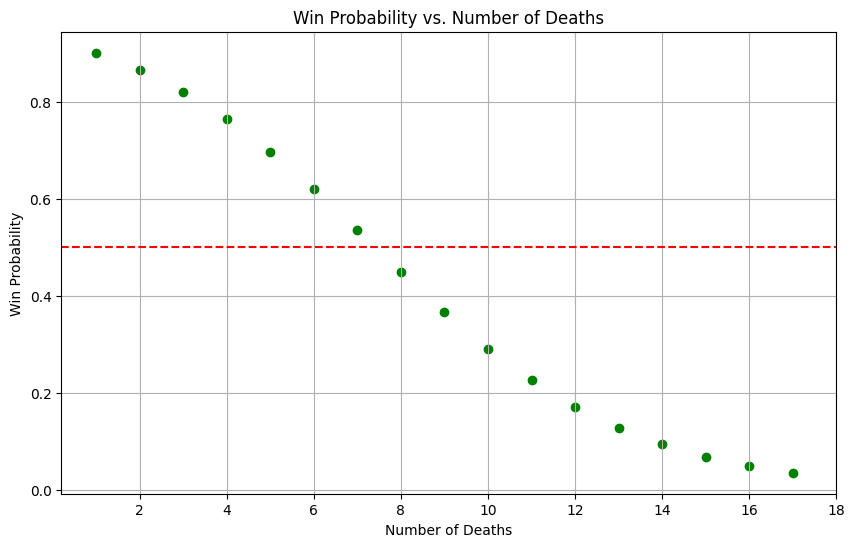

In [440]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')


x_ticks = list(range(2,20,2))

plt.xticks(x_ticks)
plt.xlabel('Number of Deaths')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Number of Deaths")

plt.axhline(y=0.5, color='red', linestyle = '--')

plt.grid(True)
plt.show()

## Win Probability vs. Assists

#### Set X - Assists, Y - Result

In [441]:
X = df['Assists']
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

#### Plot Result vs. Assists 

Text(0.5, 1.0, 'Result vs. Assists')

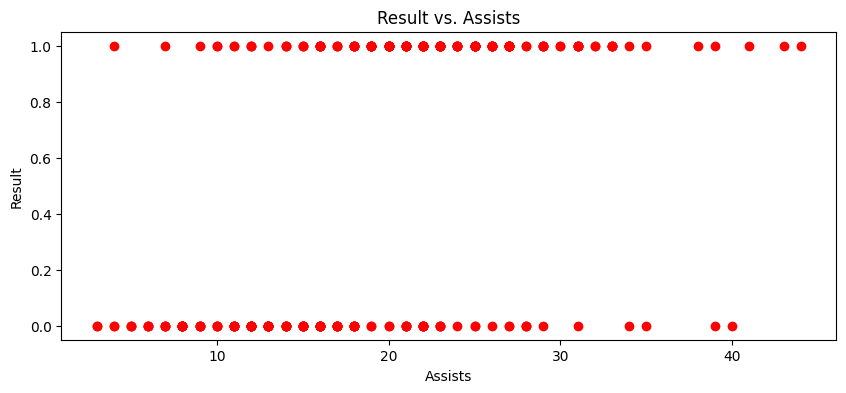

In [442]:
plt.figure(figsize = (10,4))
plt.scatter(X, y, marker = 'o', color = 'red')

plt.xlabel('Assists')
plt.ylabel('Result')
plt.title('Result vs. Assists')

#### Divide Data Set

In [443]:
X_train, X_test, y_train, y_test = train_test_split(df[['Assists']], y, train_size = 0.9)

#### Train the model

In [444]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [445]:
ypred = model.predict(X_test)

### Check Accuracy of Model


In [446]:
model.score(X_test,y_test)

0.8275862068965517

#### Predict for Number of Assists (1-30)

In [447]:
X_predict = np.arange(1,30)

In [448]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Win Probability vs. Predicted Assists

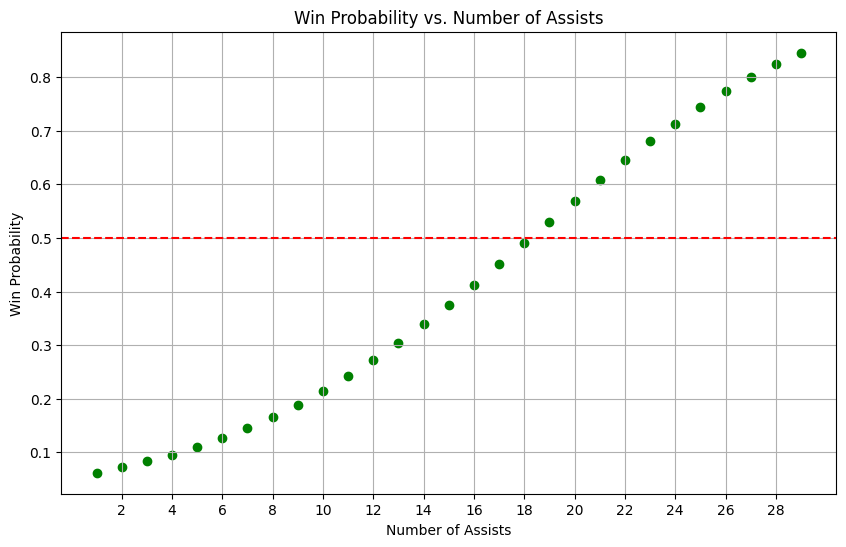

In [449]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')


x_ticks = list(range(2,30,2))

plt.xticks(x_ticks)
plt.xlabel('Number of Assists')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Number of Assists")

plt.axhline(y=0.5, color='red', linestyle = '--')

plt.grid(True)
plt.show()

## Win Probability vs. Networth


#### Set x - Networth, y - Win Probability

In [450]:
X = df['Networth']

#### Plot Networth vs. Win Probability

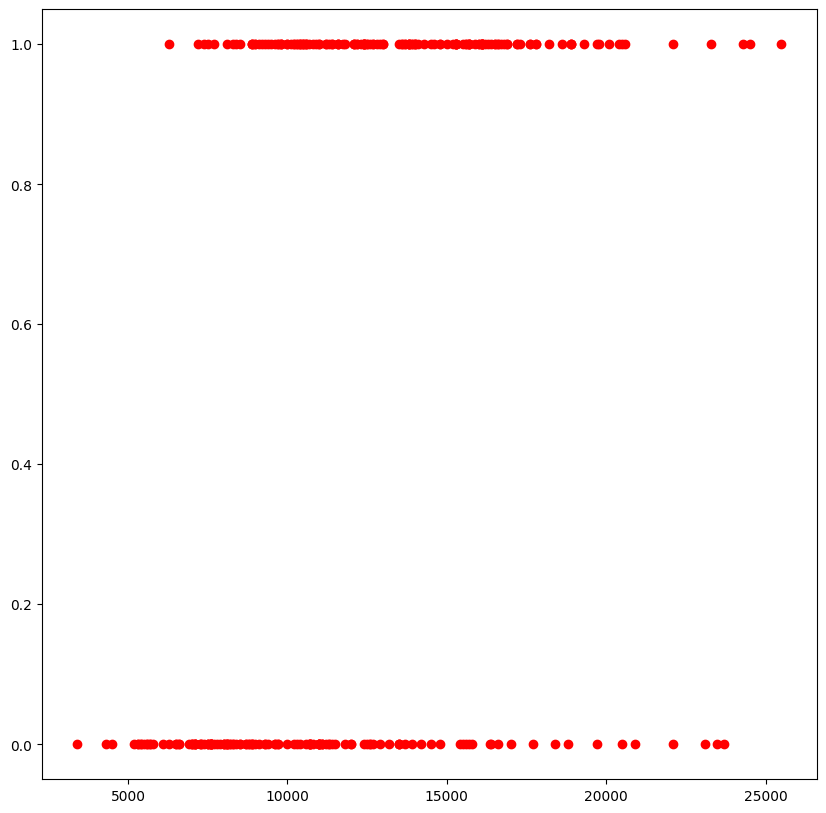

In [451]:
plt.figure(figsize = (10,10))

plt.scatter(X, y, marker = 'o', color = 'red')

#### Plot Result vs. Networth

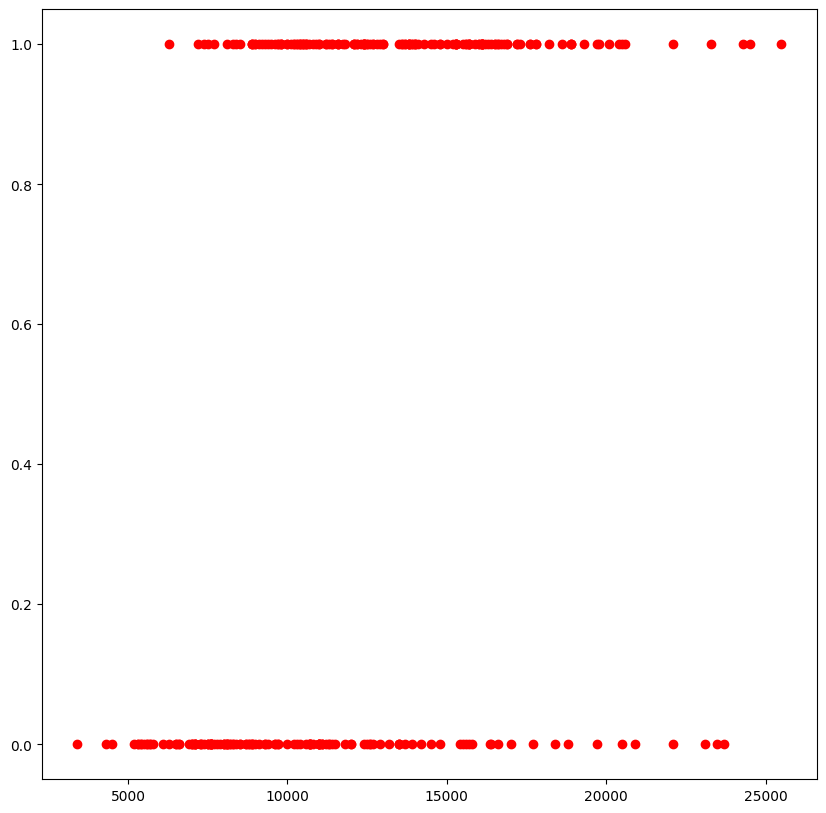

In [452]:
X = df['Networth']
y = df['Result'].replace({'Won' : 1, 'Lost' : 0}).to_frame()

plt.figure(figsize = (10,10))

plt.scatter(X, y, marker = 'o', color = 'red')

#### Divide the Data Set

In [453]:
X_train, X_test, y_train, y_test = train_test_split(df[['Networth']], y, train_size=0.9)

#### Train the model

In [454]:
model.fit(X_train, y_train)

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [455]:
ypred = model.predict(X_test)

#### Check Accuracy of Model

In [456]:
model.score(X_test,y_test)

0.5862068965517241

#### Predict networth in range of 1-25000

In [457]:
X_predict = np.arange(1,25000, 1000)

In [458]:
probabilities = model.predict_proba(X_predict.reshape(-1, 1))

C:\Users\henry\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


#### Plot Win Probability vs. Predicted Networth

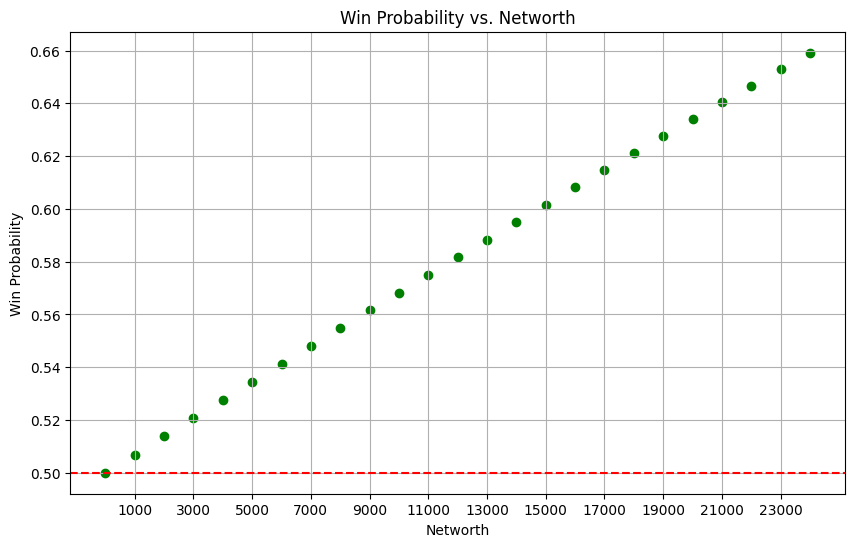

In [459]:
plt.figure(figsize = (10,6))

plt.scatter(X_predict, probabilities[:,1], marker = 'o', color = 'green')

x_ticks = list(range(1000,25000,2000))

plt.xticks(x_ticks)
plt.xlabel('Networth')
plt.ylabel('Win Probability')
plt.title("Win Probability vs. Networth")

plt.axhline(y=.5, color = 'red' , linestyle = '--')
plt.grid(True)
plt.show()